# Sign Language Digit Recognition

### Import the following depencies

If any of the below packages are not installed on your computer please execute the following command:

In jupyter notebook:
* !pip3 install numpy
* !pip3 install matplotlib
* !pip3 install keras
* !pip3 install sklearn

If on terminal follow the above commands but without '!'  


In [190]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import  Flatten, Dense ,Convolution2D,MaxPool2D
from sklearn.cross_validation import train_test_split
from keras.utils import to_categorical



Once we have all our dependencies set-up we can load our processed training data which we obtained from running the imgdatagen.py file.
#### Take note to ensure the path of the file you are trying to load is correct/

In [191]:
'''
X=np.load('INSERT PATH HERE/X_data.npy')#Input data
y=np.load('INSERT PATH HERE/y_data.npy')#Expected lables/Outputs
'''
X=np.load('/home/ashwin/Desktop/Sign-Language-Digits-Dataset-master/X_data.npy')#Input data
y=np.load('/home/ashwin/Desktop/Sign-Language-Digits-Dataset-master/y_data.npy')#Expected lables/Outputs


### One hot Encoding
We will need to convert our output lables from normal values to an encoded vector.<br>
The conversion will be such that if the y value equals 3.<br>
The one-hot encoded vector will look like [0,0,0,1,0,0,0,0,0,0]
But fortunetly for us we have a prebuilt function to do this for us.


In [192]:
y=to_categorical(y,num_classes=10)


### Now we can define our image size
Note the orginal data set contains images of size 100x100.

In [193]:
IMG_SIZE=64

### Now we shall divide the dataset into training and testing sets 
This becomes convinient as we have a inbuilt function for this too!! (Python is great right?!)

In [194]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

#We need to reshape our data to a 4-d tensor because our model expects it to be so(despited one of the dim being 1)
X_train=X_train.reshape((len(X_train),64,64,1))
X_test=X_test.reshape((len(X_test),64,64,1))


## Convolutional Neural Network

   A Convolutional Neural Net is a machine learning model which has proven to give state-of-the-art performance in image recognition tasks.<br>It was originally invented by [Yann LeCun](https://en.wikipedia.org/wiki/Yann_LeCun) a leading AI researcher.
### Mimicing the brain
   Convolutional networks were inspired by biological processes in that the connectivity pattern between neurons <b>resembles</b> the organization of the animal <b>visual cortex</b>. Individual cortical neurons respond to stimuli only in a restricted region of the visual field known as the <b>receptive field</b>. The receptive fields of different neurons partially overlap such that they cover the entire visual field.
   ![CNN](CNN.gif "CNN")   
#### Max Pooling 
   Convolutional networks may include local or global pooling layers[clarification needed], which combine the outputs of neuron clusters at one layer into a single neuron in the next layer.For example, max pooling uses the maximum value from each of a cluster of neurons at the prior layer.
    ![Maxpool](maxpool.gif "MaxPool")   
   
### Advantage of a CNN over a Fully-Connected Neural Net
   Regardless of image size, tiling regions of size(filter size) 5 x 5, each with the same shared weights, requires only 25 learnable parameters. In this way, it resolves the vanishing or exploding gradients problem in training traditional multi-layer neural networks with many layers by using backpropagation.<br><br>
   A distinguishing feature of CNNs is that many neurons share the same filter. This reduces memory footprint because a single bias and a single vector of weights is used across all receptive fields sharing that filter, rather than each receptive field having its own bias and vector of weights. 
   


## Okay now what kind of images are we dealing with here?
Preview.

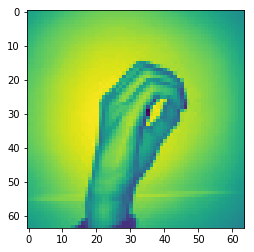

In [195]:
img=X[1]
plt.imshow(img)


## Keras

### What is keras?
   Keras is an open source neural network library written in Python. It is capable of running on top of TensorFlow, Microsoft Cognitive Toolkit, or Theano. Designed to enable fast experimentation with deep neural networks, it focuses on being user-friendly, modular, and extensible.Just perfect!
   

### Building a CNN in keras
   After all thats been told about a CNN you must think its a dauntingly difficult task to impliment one right?
<br>Take a look below.

In [196]:

def conv_net():

    model=Sequential()
    print ('Sequential check')
    
    model.add(Convolution2D(32,(4,4),input_shape=(IMG_SIZE,IMG_SIZE,1),activation='relu'))
    print ('Conv2D layer 1')
    model.add(MaxPool2D(pool_size=(2,2),strides=(4,4)))
    print('Maxpool-1')
    
    model.add(Convolution2D(50,(4,4),activation='relu'))
    print ('Conv2D layer 2')
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    print('Maxpool-2')
    
    model.add(Convolution2D(100,(4,4),activation='relu'))
    print ('Conv2D layer 3')
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    print('Maxpool-3')
    
    model.add(Flatten())
    print('Flatten')
    
    
    model.add(Dense(100,activation='relu'))
    print("Dense-Final")
    model.add(Dense(units=10, activation='softmax'))
    print("Output Softmax")

    return model


### CNN Architecture 

In [197]:
#Creating a CNN object
l5_cnn=conv_net()

Sequential check
Conv2D layer 1
Maxpool-1
Conv2D layer 2
Maxpool-2
Conv2D layer 3
Maxpool-3
Flatten
Dense-Final
Output Softmax


In [198]:
#Defining parameters
l5_cnn.compile('adam',loss='categorical_crossentropy',metrics=['acc'])

### And finally let's Train our network 

In [199]:
#Training out CNN!
l5_cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1546/1546 [==============================] - 6s 4ms/step - loss: 6.2017 - acc: 0.1048
Epoch 2/10
1546/1546 [==============================] - 5s 3ms/step - loss: 2.0743 - acc: 0.2387
Epoch 3/10
1546/1546 [==============================] - 5s 3ms/step - loss: 1.4530 - acc: 0.4651
Epoch 4/10
1546/1546 [==============================] - 5s 3ms/step - loss: 1.1475 - acc: 0.5918
Epoch 5/10
1546/1546 [==============================] - 5s 3ms/step - loss: 0.9468 - acc: 0.6475
Epoch 6/10
1546/1546 [==============================] - 5s 3ms/step - loss: 0.8438 - acc: 0.6986
Epoch 7/10
1546/1546 [==============================] - 5s 3ms/step - loss: 0.6990 - acc: 0.7426
Epoch 8/10
1546/1546 [==============================] - 5s 3ms/step - loss: 0.6752 - acc: 0.7671
Epoch 9/10
1546/1546 [==============================] - 5s 3ms/step - loss: 0.6176 - acc: 0.7833
Epoch 10/10
1546/1546 [==============================] - 5s 3ms/step - loss: 0.5362 - acc: 0.8137


### Making Predictions

In [200]:
preds=l5_cnn.predict_classes(X_test)

### Evaluating Scores

In [201]:
score=l5_cnn.evaluate(X_test,y_test)

print(score)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


516/516 [==============================] - 1s 2ms/step
[0.7686941528967185, 0.7131782945736435]
Test loss: 0.7686941528967185
Test accuracy: 0.7131782945736435


### Decoding one-hot
The below 2-lines should do the trick.

In [202]:
#converting y_test from one-hot to decimal
y_test_num=[np.argmax(Y) for Y in y_test]
y_test_num=np.asarray(y_test_num)
#y_test_num=y_test_num.reshape((1,len(y_test_num)))
#len(y_test_num)

### Logging misclassification

In [203]:
misclassified=[]
ctr=0
score=0
for i,j in zip(y_test_num,preds):
    if i==j:
        score+=1
    else:
        misclassified.append((X_test[ctr],y_test[ctr],preds[ctr]))

### Result's!!

In [204]:
#FINAL SCORE
print ("Final Score :",score,"/",len(y_test))
print ("Number of miscalssifications :",len(misclassified))

Final Score : 368 / 516
Number of miscalssifications : 148


The following matrix contains the requried output classification lables for our training set.

In [205]:
#Given data (EXPECTED OUTPUTS)

y_test_num

array([8, 7, 0, 2, 2, 3, 9, 4, 4, 9, 1, 3, 3, 5, 2, 4, 2, 3, 0, 6, 8, 9,
       9, 8, 8, 5, 1, 0, 1, 1, 1, 3, 0, 0, 3, 7, 0, 8, 6, 0, 3, 1, 4, 6,
       6, 9, 0, 0, 9, 4, 7, 7, 7, 0, 2, 4, 1, 5, 4, 7, 8, 6, 3, 9, 0, 0,
       7, 7, 2, 4, 2, 2, 6, 6, 4, 6, 1, 9, 5, 3, 2, 8, 3, 9, 6, 7, 4, 3,
       7, 0, 1, 0, 8, 5, 0, 0, 8, 7, 6, 5, 5, 3, 5, 4, 6, 3, 6, 0, 0, 7,
       1, 1, 3, 9, 9, 9, 9, 0, 5, 5, 5, 1, 4, 2, 9, 0, 4, 0, 4, 3, 8, 2,
       5, 6, 9, 3, 5, 1, 5, 7, 1, 2, 3, 4, 2, 3, 9, 8, 2, 8, 6, 4, 6, 7,
       7, 5, 2, 6, 8, 7, 3, 6, 7, 7, 7, 3, 9, 6, 1, 1, 7, 1, 8, 4, 9, 2,
       5, 8, 3, 1, 2, 1, 4, 8, 2, 9, 2, 7, 7, 7, 0, 5, 5, 5, 8, 5, 6, 5,
       2, 0, 0, 4, 3, 0, 8, 1, 9, 5, 2, 2, 3, 0, 6, 2, 7, 5, 4, 9, 1, 8,
       5, 7, 1, 4, 5, 0, 1, 0, 4, 7, 7, 6, 9, 9, 1, 3, 3, 4, 9, 0, 3, 8,
       1, 7, 0, 0, 5, 5, 3, 7, 6, 7, 7, 7, 4, 0, 1, 3, 7, 5, 5, 8, 7, 5,
       5, 0, 3, 7, 6, 8, 4, 9, 0, 4, 9, 8, 2, 3, 2, 3, 9, 4, 3, 8, 8, 1,
       4, 1, 6, 0, 6, 2, 2, 5, 5, 6, 8, 5, 9, 4, 0,

The following matrix contain the predictions of our model.

In [206]:
#Prediction of our CNN
preds

array([8, 7, 8, 2, 2, 3, 9, 4, 5, 2, 8, 2, 3, 8, 2, 4, 2, 3, 0, 2, 8, 2,
       9, 8, 8, 5, 1, 0, 1, 1, 1, 2, 0, 0, 2, 7, 0, 7, 6, 0, 2, 6, 6, 2,
       7, 8, 0, 7, 9, 5, 7, 1, 7, 0, 3, 5, 1, 5, 4, 7, 7, 2, 3, 9, 0, 0,
       6, 7, 6, 5, 2, 2, 6, 6, 4, 4, 1, 9, 5, 3, 2, 8, 3, 9, 6, 7, 4, 2,
       7, 0, 2, 0, 8, 5, 0, 0, 8, 7, 6, 5, 5, 2, 5, 5, 2, 3, 6, 0, 0, 8,
       8, 1, 3, 5, 9, 9, 8, 0, 5, 5, 5, 2, 5, 2, 9, 0, 4, 0, 5, 2, 8, 2,
       4, 6, 9, 3, 5, 1, 5, 7, 2, 2, 2, 4, 6, 3, 9, 8, 2, 6, 6, 5, 2, 7,
       7, 5, 2, 6, 4, 7, 2, 2, 7, 7, 8, 3, 9, 3, 2, 1, 7, 2, 8, 4, 9, 2,
       5, 8, 3, 1, 2, 1, 7, 8, 8, 8, 6, 7, 7, 7, 0, 5, 4, 4, 8, 5, 2, 4,
       3, 7, 0, 4, 2, 2, 7, 1, 9, 5, 2, 2, 2, 7, 6, 2, 7, 4, 4, 9, 1, 3,
       5, 7, 1, 4, 5, 0, 6, 0, 5, 7, 7, 6, 5, 9, 2, 6, 2, 4, 9, 0, 3, 8,
       1, 7, 0, 0, 5, 5, 2, 7, 6, 7, 7, 7, 4, 6, 1, 3, 7, 5, 5, 8, 7, 5,
       5, 0, 2, 7, 6, 8, 5, 9, 0, 8, 9, 8, 2, 3, 2, 2, 2, 4, 3, 2, 8, 1,
       4, 2, 6, 0, 6, 2, 2, 9, 5, 6, 8, 4, 9, 8, 0,

In [ ]:
#preds==y_test_num

### Seeing is believing right?

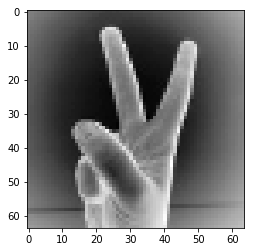

Predicted:  2
Truth    :  2


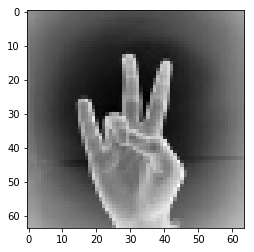

Predicted:  7
Truth    :  7


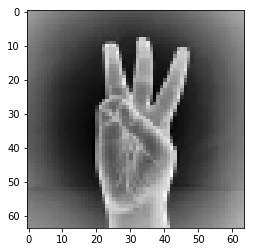

Predicted:  6
Truth    :  6


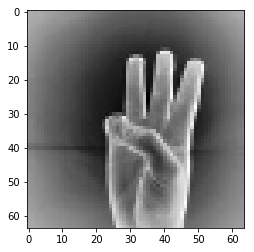

Predicted:  6
Truth    :  6


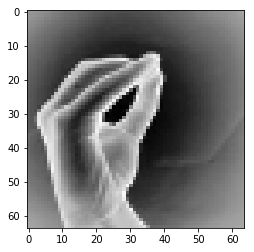

Predicted:  0
Truth    :  0


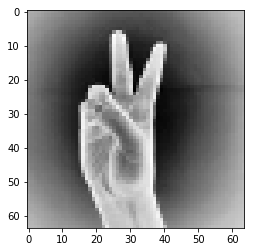

Predicted:  2
Truth    :  2


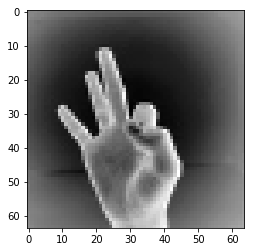

Predicted:  8
Truth    :  9


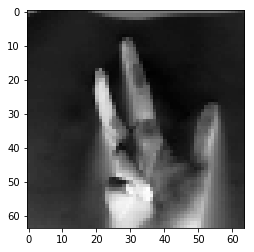

Predicted:  3
Truth    :  3


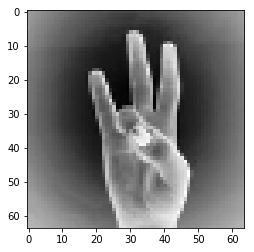

Predicted:  7
Truth    :  7


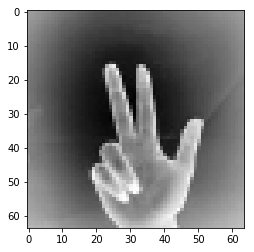

Predicted:  2
Truth    :  3


In [207]:
#Plotting some predictions

picks=[random.randrange(0,len(y_test_num)) for x in range(10)]
#picks=[0,1,2,3,4,5,6,7,8,9,10]

X_test=X_test.reshape((516,64,64))
%matplotlib inline

for p in picks:
    plt.imshow(X_test[p,:,:],cmap='Greys')
    plt.show()
    print("Predicted: ",preds[p])
    print("Truth    : ",y_test_num[p])